Glint Data Processing Master Script

In this script each of the four versions of the glint experiment are able to be processed into a master data sheet for each experiment. 

The experiments include:
(1) Original Familiar Glint
(2) Original Novel Glint
In both of these experiments, three conditions of transformed images are presented with only one stimulus duration. 

The second set of experiments include: 
(3) Familiar Glint Extreme 
(4) Novel Glint Extreme
In these two versions, three conditions of transformed images are presented with 4 different stimulus durations. 

The distinction between familiar and novel is that familiar shows participants previously learned images, while novel presents unknown images that are learned and then tested on. 


In [5]:
#Clear previous output and variables to ensure no mixing of the data
%reset -f

In [6]:
# Import Necessary Packages 
import os
import pandas as pd
import glob
import numpy as np
import pdb

# Functions

Preprocessing Functions: 
1. experiment_parameters(experiment_type, is_extreme)

2. make_config(experiment_type, is_extreme, animacy_inclusion)

3. paths_of_interest(experiment, extreme)

4. new_trial_version(data, experiment, extreme, condition, animacy_inclusion, animacy=None, stimulus_duration=None)

5. filter_trials(trials, condition)

6. alternate_variables_of_interest(experiment, extreme, sub, condition, animacy_inclusion, trials, final_trials, number_of_no_responses, animacy=None, stimulus_duration=None)

7. preprocessing_pipeline(experiment_type, is_extreme, animacy_inclusion)

Exclusion functions:
1. determine_number_of_choices(experiment, extreme)

2. natural_accuracy_per_subject(sub_summary)

3. threshold_below_2sd(per_sub)

4. chance_calculator(number_of_choices)

5. flag_below_chance(sub_summary, number_of_choices)

6. flag_below_2sd(sub_summary, flagged_below_chance)

7. remove_flagged_subjects(sub_summary, flagged, delete=True)

8. create_wide_format(cleaned)

9. save_sub_summary(long_df, wide_df, experiment, extreme, output_path)

In [ ]:
# First half of this cell contains all the functions needed for filtering and processing the data into a consolidated data frame\
# Second half of this cell contains all the functions needed for checking and removing participants who meet our exclusion criteria


# Function 1: Set Experiment Parameters
# Purpose: To set the experiment type and whether it's extreme or not, this will be used to populate the other functions and variables and reduce redundancy
# This function avoids the use of global variables by returning the parameters directly
# It takes in experiment_type and is_extreme as arguments and returns them as a tuple
# This makes the code cleaner and easier to maintain

def experiment_parameters(experiment_type, is_extreme):
    """Returns experiment and extreme without setting globals."""
    if experiment_type == 'novel' and is_extreme == False: # Novel_original version
        experiment = 'novel' 
        extreme = False
    elif experiment_type == 'novel' and is_extreme == True: # Novel_extreme version
        experiment = 'novel'
        extreme = True
    elif experiment_type == 'familiar' and is_extreme == False: # Familiar_original version
        experiment = 'familiar'
        extreme = False
    elif experiment_type == 'familiar' and is_extreme == True: # Familiar_extreme version
        experiment = 'familiar'
        extreme = True
    return experiment, extreme

# Function 2: Make Config Dictionary
# Purpose: To create a config dictionary that holds the experiment parameters for easy access in other functions
# This reduces the need for multiple global variables and makes the code cleaner, more modular, and easier to maintain
# The config dictionary will contain keys for 'experiment', 'extreme', and 'animacy_inclusion'

def make_config(experiment_type, is_extreme, animacy_inclusion):
    """Build a small configuration dictionary so downstream calls need only one object."""
    experiment, extreme = experiment_parameters(experiment_type, is_extreme)
    if experiment == 'novel':  # force animacy to False for novel, as all novel images are inanimate_artificial
        animacy_inclusion = False # override animacy_inclusion to False for novel experiment
    return {
        'experiment': experiment,
        'extreme': extreme,
        'animacy_inclusion': animacy_inclusion,
    }

# Function 3: Paths of Interest
# Purpose: To determine the file paths based on the experiment type and whether it's extreme or not
# This function avoids the use of global variables by taking experiment and extreme as parameters
# It returns the list of file paths that match the criteria

def paths_of_interest(experiment, extreme): #Remove all the different path variables and just use experiment and extreme to determine the path, this will reduce redundancy and make the code cleaner
    """Takes experiment and extreme as parameters instead of using globals."""
    base = '/zpool/vladlab/data_drive/glint_data'
    
    if experiment == 'familiar' and extreme == False:
        core_path = f'{base}/{experiment}_glint' # set core path using experiment variable and base path
        print("You have selected familiar glint experiment")
        files = glob.glob(f'{core_path}/*.csv') #get all csv files in the core path
    elif experiment == 'novel' and extreme == False:
        core_path = f'{base}/{experiment}_glint' # set core path using experiment variable and base path
        print("You have selected novel glint experiment")
        files = glob.glob(f'{core_path}/*.csv') #get all csv files in the core path
    elif experiment == 'familiar' and extreme == True:
        core_path = f'{base}/{experiment}_glint_extreme' # set core path using experiment variable and base path
        print("You have selected familiar glint extreme experiment")
        files = glob.glob(f'{core_path}/*.csv') #get all csv files in the core path
    elif experiment == 'novel' and extreme == True:
        core_path = f'{base}/{experiment}_glint_extreme' # set core path using experiment variable and base path
        print("You have selected novel glint extreme experiment")
        files = glob.glob(f'{core_path}/*.csv') #get all csv files in the core path
    return files


'''
FUnction 4: New Trial Version
purpose: To filter the data based on experiment type, extreme status, condition, animacy inclusion, and other parameters

'''
# Function 4: New Trial Version
# Purpose: To filter the data based on experiment type, extreme status, condition, animacy inclusion, and other parameters
# It Essentiallt creates a data frame for that specific version of the experiment based on the parameters passed to it, and filters the data accordingly
# This function avoids the use of global variables by taking all necessary parameters
# It returns trials based on the specified criteria of that experiment version
# Make animacy necessry rather than optional 

## Rename the column headers to all be the same in an earlier function

def new_trial_version(data, experiment, extreme, condition, animacy_inclusion, animacy=None, stimulus_duration=None):
    """Takes experiment and extreme as parameters instead of using globals."""
    trials = None
    
    if animacy_inclusion == True: #if animacy is included as a variable
        if experiment == 'familiar' and extreme == False:
            trials = data[(data['img_condition'] == condition) & (data['object_category'] == animacy)] # filter by condition and animacy, familiar uses img_condition
        
        elif experiment == 'novel' and extreme == False: 
            print('As novel images are all inanimate_artificial, animacy filter will not be applied.')
            ValueError('Animacy inclusion cannot be True for novel experiment.')
            
        elif experiment == 'familiar' and extreme == True:
            # filter by condition, stimulus duration, and animacy, familiar uses img_condition
            trials = data[(data['img_condition'] == condition) & (data['stimulus_duration'] == stimulus_duration) & (data['object_category'] == animacy)]

        elif experiment == 'novel' and extreme == True:
            print('As novel images are all inanimate_artificial, animacy filter will not be applied.')
            ValueError('Animacy inclusion cannot be True for novel experiment.')

    elif animacy_inclusion == False: #if animacy is not included as a variable 
        if experiment == 'familiar' and extreme == False: 
            trials = data[data['img_condition'] == condition]  # familiar uses img_condition
        elif experiment == 'novel' and extreme == False:
            trials = data[data['condition'] == condition] # novel uses condition
        elif experiment == 'familiar' and extreme == True: #adds stimulus duration as a variable
            trials = data[(data['img_condition'] == condition) & (data['stimulus_duration'] == stimulus_duration)] # familiar uses img_condition
        elif experiment == 'novel' and extreme == True: #adds stimulus duration as a variable
            trials = data[(data['condition'] == condition) & (data['stimulus_duration'] == stimulus_duration)]  # novel uses condition
    
    if trials is None:
        print(f"Warning: No trials matched for condition={condition}, animacy_inclusion={animacy_inclusion}, experiment={experiment}, extreme={extreme}")
    return trials

# Function 5: Filter Trials
# Purpose: To filter out trials based on response labels and reaction times
# This function avoids the use of global variables by taking trials and condition as parameters
# It returns the filtered trials and the number of no responses

def filter_trials(trials, condition):
    """No globals needed here, but explicit for clarity."""
    no_response_filter = trials[trials['response_label'] != 'no response'] #filter out no responses
    number_of_no_responses = len(trials) - len(no_response_filter) #count number of no responses
    print(f"  {condition}: {number_of_no_responses} no responses filtered out") 
    
    rt_less_equal_100 = no_response_filter[no_response_filter['key_resp.rt'] >= 0.100] #filter out RTs less than or equal to 100ms
    number_of_fast_responses = len(no_response_filter) - len(rt_less_equal_100) #count number of RTs less than or equal to 100ms
    print(f"  {condition}: {number_of_fast_responses} trials with RT < 100ms filtered out")
    
    rt_plus_minus_2sd = rt_less_equal_100['key_resp.rt'].dropna() #drop NaN values for RT
    mean_rt = rt_plus_minus_2sd.mean() #calculate mean RT
    std_rt = rt_plus_minus_2sd.std(ddof=1) #calculate standard deviation of RT
    
    final_trials = rt_less_equal_100[rt_less_equal_100['key_resp.rt'].between(mean_rt - 2*std_rt, mean_rt + 2*std_rt)] #filter out RTs outside mean ± 2*SD
    number_of_outliers = len(rt_less_equal_100) - len(final_trials) #count number of RT outliers
    print(f"  {condition}: {number_of_outliers} RT outliers filtered out") 
    return final_trials, number_of_no_responses 

# Function 6: Alternate Variables of Interest
# Purpose: To calculate accuracy and other metrics based on the filtered trials
# This function avoids the use of global variables by taking all necessary parameters
# It returns a dictionary with the calculated metrics and handles different cases based on animacy inclusion and extreme status
# In the main loop it will return a row dictionary with the relevant metrics that will be appended to the cleaned DataFrame

def alternate_variables_of_interest(experiment, extreme, sub, condition, animacy_inclusion, trials, final_trials, number_of_no_responses, animacy=None, stimulus_duration=None):
    """Takes experiment and extreme as parameters instead of using globals."""
    acc = trials['key_resp.corr'].mean()
    filtered_acc = final_trials['key_resp.corr'].mean()
    trial_count = len(final_trials)
    
    extreme_label = 'extreme' if extreme else 'original'
    experiment_label = f"{experiment}_{extreme_label}"
    
    if animacy_inclusion == True: #if animacy is included as a variable
        if extreme == True: #if stimulus duration is included as a variable
            row = {
                'experiment_label': experiment_label, #experiment and extreme status
                'sub': sub, #subject identifier
                'condition': condition, #condition (natural, scrambled, line_drawing)
                'stimulus_duration': stimulus_duration, #stimulus duration (only if extreme is True)
                'animacy': animacy, #animacy (only if animacy_inclusion is True)
                'un_filtered_acc': acc, #accuracy before filtering
                'filtered_acc': filtered_acc, #accuracy after filtering
                'no_responses': number_of_no_responses, #number of no responses
                'num_trials_after_exclusion': trial_count, #number of trials after all exclusions
            }
        elif extreme == False: #if stimulus duration is not included as a variable
            row = {
                'experiment_label': experiment_label, #experiment and extreme status
                'sub': sub, #subject identifier
                'condition': condition, #condition (natural, scrambled, line_drawing)
                'animacy': animacy, #animacy (only if animacy_inclusion is True)
                'un_filtered_acc': acc, #accuracy before filtering
                'filtered_acc': filtered_acc, #accuracy after filtering
                'no_responses': number_of_no_responses, #number of no responses
                'num_trials_after_exclusion': trial_count, #number of trials after all exclusions
            }
    elif animacy_inclusion == False: #if animacy is not included as a variable
        if extreme == True: #if stimulus duration is included as a variable
            row = {
                'experiment_label': experiment_label,
                'sub': sub,
                'condition': condition,
                'stimulus_duration': stimulus_duration,
                'un_filtered_acc': acc,
                'filtered_acc': filtered_acc,
                'no_responses': number_of_no_responses,
                'num_trials_after_exclusion': trial_count,
            }
        elif extreme == False: #if stimulus duration is not included as a variable
            row = {
                'experiment_label': experiment_label,
                'sub': sub,
                'condition': condition,
                'un_filtered_acc': acc,
                'filtered_acc': filtered_acc,
                'no_responses': number_of_no_responses,
                'num_trials_after_exclusion': trial_count,
            }
    
    print(f"  {condition} = acc: {filtered_acc:.3f}, no_responses: {number_of_no_responses}")
    return row


# Core Function (7): Preprocessing Pipeline
# Purpose: It orchestrates the entire data processing workflow running the entire preprocessing pipeline 
# for the given experiment type, extreme status, and animacy inclusion.
# This function avoids the use of global variables by taking all necessary parameters
# It returns the final sub_summary DataFrame and the config dictionary for downstream use.

def preprocessing_pipeline(experiment_type, is_extreme, animacy_inclusion):
    """Pure function - no globals set, returns sub_summary and config."""
    
    cfg = make_config(experiment_type, is_extreme, animacy_inclusion) #calls config function to normalize parameters for helper functions 

    experiment = cfg['experiment'] #version of the experiment: familiar or novel
    extreme = cfg['extreme'] #whether extreme version or not
    animacy_inclusion = cfg['animacy_inclusion'] #whether to include animacy as a variable or not
    
    # Build column list based on parameters
    if extreme: 
        base_cols = ['experiment_label', 'sub', 'condition', 'stimulus_duration'] #columns only needed if extreme is True
    else:
        base_cols = ['experiment_label', 'sub', 'condition'] #columns only needed if extreme is False
    if animacy_inclusion: 
        base_cols.append('animacy') #if animacy is included, add animacy column
    base_cols += ['un_filtered_acc', 'filtered_acc', 'no_responses', 'num_trials_after_exclusion'] #common columns for all cases
    
    sub_summary = pd.DataFrame(columns=base_cols) #initialize empty dataframe with the appropriate columns, this will hold the final summary data
    files = paths_of_interest(experiment, extreme) #get list of files to process based on experiment and extreme status
    
    # Loop through each subject in this version of the experiment and process their data
    for file in files:
        print(f"\nProcessing file: {file}")
        try:
            data = pd.read_csv(file) #read in the data file
        except Exception as e:
            print(f"Failed to read {file}: {e}")
            raise ValueError("No file by this name.")
        
        if 'participant' not in data.columns:
            print(f"Error detected, 'participant' column missing in {file}")
            raise ValueError("Missing 'participant' column in data.")
        
        sub = data.loc[0, 'participant'] #get subject identifier from the data
        condition_summary = pd.DataFrame(columns=sub_summary.columns) #initialize empty dataframe for this subject's conditions
        
        # Loop through each condition and process trials
        for condition in ['natural', 'scrambled', 'line_drawing']: #loop through each condition
            # Check for required columns
            needed = ['key_resp.corr', 'response_label'] #common needed columns
            if experiment == 'familiar':
                needed.append('img_condition') # familiar experiment uses img_condition
            else:
                needed.append('condition') # novel experiment uses condition
            
            if any(col not in data.columns for col in needed): 
                print(f"Missing expected columns in {file}") 
                raise ValueError("Missing expected columns in data.") # error if any needed columns are missing
            
            # Check practice accuracy if column exists
            if 'prac_key_resp.corr' in data.columns:
                practice_trials = data['prac_key_resp.corr'].mean() #calculate practice trials accuracy
                print(f"  Practice trials accuracy: {practice_trials:.3f}")
                if practice_trials < 0.05:
                    print(f"  Caution: Low accuracy in practice trials for {file}. Check data quality.")
            else:
                print(f"  Warning: 'prac_key_resp.corr' column not found in {file}") 
            
            # Determine durations and animacies to loop
            durations = [0.3, 0.136, 0.068, 0.034] if extreme == True else [None] #durations only matter if extreme is True
            
            # Define animacies based on animacy_inclusion
            animacies = ['anim_natural', 'inanim_natural', 'inanim_artificial'] if animacy_inclusion == True else [None] #animacies only matter if animacy_inclusion is True
            
            # Loop through stimulus durations and animacies if applicable
            for stimulus_duration in durations: #Only applicable if extreme is True

                # Nested loop for animacy if applicable
                for animacy in animacies: #loop through each animacy

                    # Use trials function to import trials and filter based on current parameters
                    trials = new_trial_version(data, experiment, extreme, condition, animacy_inclusion, animacy, stimulus_duration) #get trials based on current parameters

                    # Check if trials is None or empty, and will raise an error if so
                    if trials is None or len(trials) == 0:
                        print(f"  No trials found for {condition}, {animacy}, {stimulus_duration}") 
                        raise ValueError("No trials found.")
                    
                    # Use filter_trials function to filter trials and get number of no responses
                    final_trials, number_of_no_responses = filter_trials(trials, condition) #get filtered trials and number of no responses
                    
                    # Calculate the variables of interest and compile into a row for condition summary
                    row = alternate_variables_of_interest(
                        experiment, extreme, sub, condition, animacy_inclusion,
                        trials, final_trials, number_of_no_responses,
                        animacy=animacy, stimulus_duration=stimulus_duration
                    )
                    # Add the row to the condition summary
                    condition_summary = pd.concat([condition_summary, pd.DataFrame([row])], ignore_index=True) #append the row to the condition summary
        
        # After processing all conditions for this subject, append to the overall sub_summary
        sub_summary = pd.concat([sub_summary, condition_summary], ignore_index=True) #append the condition summary to the overall sub_summary
    
    print("\nFinal sub_summary:")
    print(sub_summary)
    return sub_summary, cfg  # return config so downstream steps use the same values

# Caller usage example (not part of the module, just for illustration)
print("=== EXAMPLE CALLER USAGE ===")
print("# Step 1: Run the pipeline (returns data + config, no globals)")
print("sub_summary, cfg = preprocessing_pipeline(experiment_type='familiar', is_extreme=False, animacy_inclusion=True)")

'''
Exclusion Criteria Functions:
The following functions define exclusion criteria based on accuracy thresholds and trial counts.
Exclusion Criteria #1: Participant Natural Accuracy is less than or equal to chance
Exclusion Criteria #2: Natural Accuracy is less than or equal to 2 SD units from natural group mean
'''
# Exclusion Criteria Function (1) : Determine Number of Choices
# Purpose: To determine the number of response options based on the experiment type and extreme status
# This function avoids the use of global variables by taking experiment and extreme as parameters
# It returns the number of choices for the given experiment/extreme combination

def determine_number_of_choices(experiment, extreme):
    """Return the number of response options for the given experiment/extreme combo."""
    mapping = {
        ('novel', False): 4,
        ('novel', True): 4,
        ('familiar', True): 6,
        ('familiar', False): 9,
    }
    try:
        return mapping[(experiment, extreme)]
    except KeyError as exc:
        raise ValueError(f"Unexpected experiment/extreme combo: {experiment}, {extreme}") from exc

# Exclusion Criteria Function (2) : Natural Accuracy Per Subject
# Purpose: To calculate the mean filtered accuracy for the natural condition per subject
# This function avoids the use of global variables by taking sub_summary as a parameter
# It returns a DataFrame with subjects and their corresponding natural condition accuracies
# As our exclusion criteria are dependent on natural condition accuracies,
# this function is essential for downstream calculations for our exclusion criteria

def natural_accuracy_per_subject(sub_summary):
    """Returns per_sub DataFrame with natural condition accuracies per subject."""
    natural_acc = sub_summary[sub_summary['condition'] == 'natural'] # Filters for the condition of natural, and calculates the mean
    
    if natural_acc.empty:
        print("No 'natural' rows found in `sub_summary`.")
        # Return empty DataFrame with expected columns to avoid UnboundLocalError
        raise ValueError("No 'natural' rows found in sub_summary; cannot compute exclusion criteria.")
    
    per_sub = (
        natural_acc.groupby('sub', as_index=False)['filtered_acc']
        .mean()
        .rename(columns={'filtered_acc': 'natural_filtered_acc'})
    )
    return per_sub

# Exclusion Criteria Function (3) : Threshold Below 2SD
# Purpose: To calculate the threshold for exclusion based on mean - 2*SD of natural accuracies
# This function avoids the use of global variables by taking per_sub as a parameter
# and it returns the calculated threshold value

def threshold_below_2sd(per_sub):
    """Calculate threshold at mean - 2*SD for natural accuracy."""
    mean_nat = per_sub['natural_filtered_acc'].mean() #calculate mean of natural filtered accuracy
    sd_nat = per_sub['natural_filtered_acc'].std(ddof=1) #calculate standard deviation of natural filtered accuracy
    thresh = mean_nat - 2 * sd_nat #calculate threshold as mean - 2*SD
    print(f"Natural condition: mean = {mean_nat:.3f}, sd = {sd_nat:.3f}, threshold (mean - 2sd) = {thresh:.3f}") #print threshold values
    return thresh

# Exclusion Criteria Function (4) : Chance Calculator
# Purpose: To calculate the chance level based on the number of choices
# This function avoids the use of global variables by taking number_of_choices as a parameter
# It returns the calculated chance level

def chance_calculator(number_of_choices):
    """Calculate chance level based on number of choices."""
    chance = 1 / number_of_choices #formula for calculating chance 
    print(f"Calculated chance level based on {number_of_choices} choices: {chance:.3f}")
    return chance

# Exclusion Criteria Function (5) : Flag Below Chance
# Purpose: To flag subjects whose natural filtered accuracy is below chance level
# This function avoids the use of global variables by taking sub_summary and number_of_choices as parameters
# It returns a DataFrame of flagged subjects below chance level

def flag_below_chance(sub_summary, number_of_choices):
    """Flag subjects with natural filtered accuracy below chance."""
    chance = chance_calculator(number_of_choices) # calls our chance calculator function
    per_sub = natural_accuracy_per_subject(sub_summary) # calls our natural accuracy per subject function
    
    if per_sub.empty:
        print("No subjects to evaluate for chance criterion.")
        return pd.DataFrame(columns=['sub', 'natural_filtered_acc'])
    
    flagged_below_chance = per_sub[per_sub['natural_filtered_acc'] <= chance].copy() #flag subjects below chance level
    
    print(f"Chance threshold = {chance:.3f}") 
    print(f"Found {len(flagged_below_chance)} subject(s) below chance:") 
    if not flagged_below_chance.empty: 
        print(flagged_below_chance.sort_values('natural_filtered_acc')) #print flagged subjects below chance level
    
    return flagged_below_chance

# Exclusion Criteria Function (6) : Flag Below 2SD
# Purpose: To flag subjects whose natural filtered accuracy is below mean - 2*SD
# This function avoids the use of global variables by taking sub_summary and flagged_below_chance as parameters
# and it returns a DataFrame of flagged subjects below the 2SD threshold, combined with those below chance

def flag_below_2sd(sub_summary, flagged_below_chance):
    """Flag subjects below 2 SD from mean. Takes flagged_below_chance as parameter."""
    per_sub = natural_accuracy_per_subject(sub_summary) # calls our natural accuracy per subject function
    
    if per_sub.empty:
        print("No subjects to evaluate for 2SD criterion.")
        return pd.DataFrame(columns=['sub', 'natural_filtered_acc'])
    
    thresh = threshold_below_2sd(per_sub)
    flagged = per_sub[per_sub['natural_filtered_acc'] <= thresh].copy() #flag subjects below 2SD threshold
    
    print(f"Threshold for exclusion (mean - 2sd) = {thresh:.3f}")
    print(f"Found {len(flagged)} subject(s) below or equal to threshold:")
    if not flagged.empty:
        print(flagged.sort_values('natural_filtered_acc'))
    
    # Combine with flagged_below_chance if any
    if not flagged_below_chance.empty:
        flagged = pd.concat([flagged, flagged_below_chance], ignore_index=True).drop_duplicates()  #combine flagged subjects below chance with those below 2SD threshold
        print("Subjects below chance combined with subjects below 2SD threshold.")
    
    if flagged.empty:
        print("No subjects are below (or equal to) mean - 2*SD for natural filtered accuracy.")
    else:
        print(f"Flagged {len(flagged)} subject(s) total for exclusion:")
        print(flagged.sort_values('natural_filtered_acc'))
    
    return flagged 

# Exclusion Criteria Function (7) : Remove Flagged Subjects
# Purpose: To remove flagged subjects from the sub_summary DataFrame
# This function avoids the use of global variables by taking sub_summary and flagged as parameters
# and it returns the cleaned sub_summary DataFrame with flagged subjects removed

def remove_flagged_subjects(sub_summary, flagged, delete=True):
    """Remove flagged subjects from sub_summary and returns cleaned data."""
    if flagged.empty:
        print("No subjects to remove based on exclusion criteria.")
        return sub_summary.copy() #return original sub_summary if no flagged subjects
    
    flagged_df = flagged.copy() #make a copy of flagged subjects DataFrame
    print(f"Flagged subjects to remove ({len(flagged_df)}):")
    print(flagged_df.sort_values('natural_filtered_acc'))
    
    flagged_subs = set(flagged_df['sub']) #get unique subject identifiers from flagged subjects
    n_rows_before = len(sub_summary) #count number of rows before removal
    n_rows_removed = sub_summary['sub'].isin(flagged_subs).sum() #count number of rows to be removed
    print(f"Preview: {n_rows_removed} rows (of {n_rows_before}) belong to flagged subject(s).") 
    
    if delete:
        cleaned = sub_summary[~sub_summary['sub'].isin(flagged_subs)].copy() #remove flagged subjects from sub_summary
        print(f"Removed {n_rows_removed} rows.")
    else:
        cleaned = sub_summary.copy() #keep original sub_summary if delete is False
        print("Delete=False: Keeping all rows in cleaned dataset.")
    
    return cleaned

# Exclusion Criteria Function (8) : Create Wide Format
# Purpose: To pivot the cleaned long-format DataFrame into a wide-format DataFrame
# This function avoids the use of global variables by taking the cleaned DataFrame as a parameter
# and it returns both the long-format and wide-format DataFrames

def create_wide_format(cleaned):
    cleaned_wide = None
    try:
        values = ['un_filtered_acc', 'filtered_acc', 'no_responses', 'num_trials_after_exclusion'] #values to pivot on
        if 'animacy' in cleaned.columns:
            if 'stimulus_duration' in cleaned.columns:
                pivot_df = cleaned.pivot(index='sub', columns=['condition', 'stimulus_duration', 'animacy'], values=values) #pivot table with condition, stimulus_duration, and animacy as columns
                new_cols = [] #new column names list
                for col in pivot_df.columns:
                    if len(col) == 3:
                        metric, condition, duration = col 
                        new_cols.append(f"{condition}_{duration}_{metric}") #format new column names
                    else:
                        new_cols.append("_".join([str(c) for c in col])) #join other columns as strings
                pivot_df.columns = new_cols
                pivot_df.reset_index(inplace=True)
                cleaned_wide = pivot_df #assign pivoted DataFrame to cleaned_wide
            else:
                pivot_df = cleaned.pivot(index='sub', columns=['condition','animacy'], values=values) #pivot table with condition and animacy as columns (no stimulus_duration)
                new_cols = []
                for col in pivot_df.columns: 
                    if len(col) == 2:
                        metric, condition = col 
                        new_cols.append(f"{condition}_{metric}") #format new column names
                    else:
                        new_cols.append(str(col)) #convert other columns to strings
                pivot_df.columns = new_cols 
                pivot_df.reset_index(inplace=True) 
                cleaned_wide = pivot_df #assign pivoted DataFrame to cleaned_wide
        elif 'animacy' not in cleaned.columns:
            if 'stimulus_duration' in cleaned.columns:
                pivot_df = cleaned.pivot(index='sub', columns=['condition', 'stimulus_duration'], values=values) #pivot table with condition and stimulus_duration as columns (no animacy)
                new_cols = []
                for col in pivot_df.columns:
                    if len(col) == 3:
                        metric, condition, duration = col
                        new_cols.append(f"{condition}_{duration}_{metric}")
                    else:
                        new_cols.append("_".join([str(c) for c in col]))
                pivot_df.columns = new_cols 
                pivot_df.reset_index(inplace=True)
                cleaned_wide = pivot_df #assign pivoted DataFrame to cleaned_wide
            else:
                pivot_df = cleaned.pivot(index='sub', columns='condition', values=values) #pivot table with condition as columns (no animacy or stimulus_duration)
                new_cols = [] 
                for col in pivot_df.columns:
                    if len(col) == 2:
                        metric, condition = col 
                        new_cols.append(f"{condition}_{metric}") #format new column names
                    else:
                        new_cols.append(str(col)) #convert other columns to strings
                pivot_df.columns = new_cols
                pivot_df.reset_index(inplace=True)
                cleaned_wide = pivot_df #assign pivoted DataFrame to cleaned_wide
    except Exception as e:
        cleaned_wide = None
        print(f"Could not create wide-format: {e}")
    
    if cleaned_wide is None:
        print("Wide-format not created due to error.")
    return cleaned, cleaned_wide

# Exclusion Criteria Function (9) : Save Sub Summary
# Purpose: To save the cleaned long-format and wide-format DataFrames to CSV files
# This function avoids the use of global variables by taking all necessary parameters
# It saves the DataFrames to the specified output path

def save_sub_summary(long_df, wide_df, experiment, extreme, output_path):
    """No globals - takes all needed parameters."""
    version = 'extreme' if extreme else 'original' #determine version based on extreme status
    final_csv = f'{experiment}_glint_{version}_cleaned.csv' #construct final CSV filename

    if 'animacy' in long_df.columns and 'animacy' in wide_df.columns:
        long_df.to_csv(os.path.join(output_path, final_csv), index=False) #save long-format DataFrame to CSV
        print(f"Final cleaned sub_summary saved to {os.path.join(output_path, final_csv)}") 
        
        wide_df.to_csv(os.path.join(output_path, f'{experiment}_glint_{version}_cleaned_wide.csv'), index=False) #save wide-format DataFrame to CSV
        print(f"Final cleaned wide-format sub_summary saved to {os.path.join(output_path, f'{experiment}_glint_{version}_cleaned_wide.csv')}")
    if 'animacy' not in long_df.columns and 'animacy' not in wide_df.columns:
        long_df.to_csv(os.path.join(output_path, final_csv), index=False) #save long-format DataFrame to CSV
        print(f"Final cleaned sub_summary saved to {os.path.join(output_path, final_csv)}") 
        
        wide_df.to_csv(os.path.join(output_path, f'{experiment}_glint_{version}_cleaned_wide.csv'), index=False) #save wide-format DataFrame to CSV
        print(f"Final cleaned wide-format sub_summary saved to {os.path.join(output_path, f'{experiment}_glint_{version}_cleaned_wide.csv')}")


=== EXAMPLE CALLER USAGE ===
# Step 1: Run the pipeline (returns data + config, no globals)
sub_summary, cfg = preprocessing_pipeline(experiment_type='familiar', is_extreme=False, animacy_inclusion=True)


Begin Preprocessing and Exclusion

Run the first cell to execute basic preprocessing to create a summary data frame.

Once complete, then run the exclusion criteria checks. 

In [8]:
#Step 1: Run the preprocessing pipeline to get sub_summary

#Parameter 1: experiment_type = 'novel' or 'familiar'
#Parameter 2: Extreme = True or False
#Parameter 3: animacy_inclusion = True or False 

sub_summary, cfg = preprocessing_pipeline('familiar', False, True) 


You have selected familiar glint experiment

Processing file: /zpool/vladlab/data_drive/glint_data/familiar_glint/6678813aec86d687a654dedb_familiar_glint_final_2025-11-19_10h28.44.237.csv
  Practice trials accuracy: 1.000
  natural: 0 no responses filtered out
  natural: 0 trials with RT < 100ms filtered out
  natural: 0 RT outliers filtered out
  natural = acc: 0.833, no_responses: 0
  natural: 0 no responses filtered out
  natural: 0 trials with RT < 100ms filtered out
  natural: 2 RT outliers filtered out
  natural = acc: 0.955, no_responses: 0
  natural: 2 no responses filtered out
  natural: 0 trials with RT < 100ms filtered out
  natural: 0 RT outliers filtered out
  natural = acc: 0.909, no_responses: 2
  Practice trials accuracy: 1.000
  scrambled: 1 no responses filtered out
  scrambled: 0 trials with RT < 100ms filtered out
  scrambled: 0 RT outliers filtered out
  scrambled = acc: 0.565, no_responses: 1
  scrambled: 0 no responses filtered out
  scrambled: 0 trials with RT <

In [9]:
# Step 2: Exclusion Criteria Checks
# Now that we have done trial exclusions and have a summarized version of the data, we need to perform participant exclusion

number_of_choices = determine_number_of_choices(cfg['experiment'], cfg['extreme']) # Determine number of choices for chance calculation

flagged_below_chance = flag_below_chance(sub_summary, number_of_choices) # Exclusion Criteria (1)

flagged = flag_below_2sd(sub_summary, flagged_below_chance) # Exclusion Criteria (2)

sub_summary_cleaned = remove_flagged_subjects(sub_summary, flagged, delete=True) # Remove flagged subjects

sub_summary_long_cleaned, sub_summary_wide_cleaned = create_wide_format(sub_summary_cleaned) # Create wide format


Calculated chance level based on 9 choices: 0.111
Chance threshold = 0.111
Found 0 subject(s) below chance:
Natural condition: mean = 0.952, sd = 0.108, threshold (mean - 2sd) = 0.736
Threshold for exclusion (mean - 2sd) = 0.736
Found 2 subject(s) below or equal to threshold:
                         sub  natural_filtered_acc
34  66afcaa60f7d8f58dc21db8e              0.321637
37  66cec5a3fdf1fe2c010e9971              0.639163
Flagged 2 subject(s) total for exclusion:
                         sub  natural_filtered_acc
34  66afcaa60f7d8f58dc21db8e              0.321637
37  66cec5a3fdf1fe2c010e9971              0.639163
Flagged subjects to remove (2):
                         sub  natural_filtered_acc
34  66afcaa60f7d8f58dc21db8e              0.321637
37  66cec5a3fdf1fe2c010e9971              0.639163
Preview: 18 rows (of 468) belong to flagged subject(s).
Removed 18 rows.


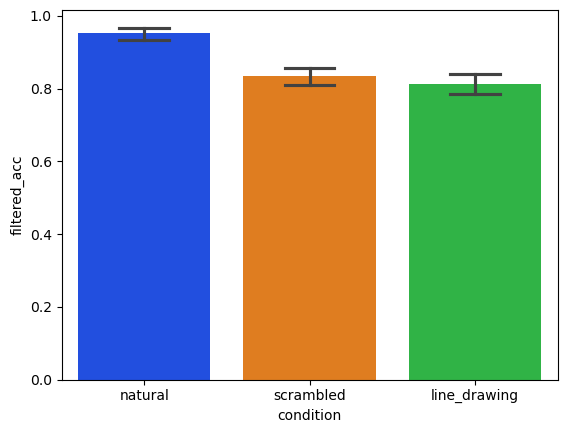

In [10]:
# Quick Visualization for debugging purposes
def plot_summary(sub_summary, extreme):
    import seaborn as sns
    import matplotlib.pyplot as plt
    if extreme == False: 
        sns.barplot(
            data=sub_summary,
            x="condition",
            y="filtered_acc",
            capsize=0.3,
            errorbar=("ci", 95),
            palette="bright",
            zorder=2,
            hue="condition"
        )
    elif extreme == True:
        sns.pointplot(
            data=sub_summary,
            x="stimulus_duration",
            y="filtered_acc",
            hue="condition",
            order=[0.3, 0.136, 0.068, 0.034],
            capsize=0.2,
            errorbar= ("ci", 95)
        )

plot_summary(sub_summary, extreme=False)

Save the Data

In [11]:
#Once visualization is complete, save the cleaned data frames
output_path = ('/zpool/vladlab/data_drive/glint_data/summary_data_csv/') #Path to save summary data CSV files

save_sub_summary(sub_summary_long_cleaned, sub_summary_wide_cleaned, 'familiar', False, output_path= '/zpool/vladlab/data_drive/glint_data/summary_data_csv/') # Save results